# Simple Linear Regression Model <br>$y=\beta_{0} + \beta_{1} x + \epsilon$

**References:**
- William Mendenhall, Dennis Wackerly, Richard Scheaffer: Mathematical Statistics with Applications

For Multi Linear Regression see the [general linear regression notebook](linear_regression.ipynb).

## Model

\begin{equation}
\boxed{
    y_{i} = \beta_{0} + \beta_{1} x_{i} + \epsilon_{i}}
\end{equation}

where:
- $y_{i}$ is the dependent/response variables ($i=1,..,n$)
- $x_{ij}$ is the the independent variables ($i=1,...,n$, $j=0,...,k$)
- $\beta_{j}$ are the regrssion parameters ($j=0,...,k$)
- $\epsilon_{i}$ is the residual, or error term ($i=1,...,n$)
- $g_{j}(x)$, some arbitrary function of $x$, ($j=1,..,k$)

Model Least-Squares estimate is denoted by $\hat{y}_{i}$:

\begin{equation}
    \hat{y}_{i}
    =
    \hat{\beta}_{0}
    +
    \hat{\beta}_{1} x_{i}
\end{equation}

Sum of squares for error (SSE):

\begin{equation}
    \text{SSE}
    =
    \sum_{i=1}^{n}
    \left( 
    y_{i} - \hat{y}_{i}
    \right)^{2}
\end{equation}

## Least-Squares estimators for $\beta_{0}$ and $\beta_{1}$: $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$

\begin{equation}
    \hat{\beta}_{0}
    =
    \bar{y} - \bar{x} \hat{\beta}_{1}
    =
    \bar{y} - \bar{x}
    \frac{S_{xy}}{S_{xx}}
\end{equation}


\begin{equation}
    \hat{\beta}_{1}
    = 
    \frac{S_{xy}}{S_{xx}}
\end{equation}

where the auxiliary quantities $S_{xx}$ and $S_{xy}$ are:

\begin{equation}
    S_{xx}
    =
    \sum_{i=1}^{n}
    \left(
        x_{i} - \bar{x}
    \right)^{2}
\end{equation}

\begin{equation}
    S_{xy}
    =
    \sum_{i=1}^{n}
    \left(
        x_{i} - \bar{x}
    \right)
    \left(
        y_{i} - \bar{y}
    \right)
\end{equation}

### Properties of $\hat{\beta}_{i}$

#### Bias

##### General case

\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    \frac{1}{n} \sum_{i=1}^{n} E[\epsilon_{i}]
    -
    \frac{\bar{x}}{S_{xx}} \sum_{i=1}^{n} (x_{i} - \bar{x}) E[\epsilon_{i}]
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    \frac{1}{S_{xx}} \sum_{i=1}^{n} (x_{i} - \bar{x}) E[\epsilon_{i}]
\end{equation}

##### If the expected value of the error term is constant for all $i$

\begin{equation}
    E[\epsilon_{i}] = c,   \forall i
\end{equation}

then
\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    c
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    0
\end{equation}

##### If the expected value of the error term is 0 for all $i$

\begin{equation}
    E[\epsilon_{i}] = 0, \forall i
\end{equation}

then

\begin{equation}
    b(\hat{\beta}_{0})
    =
    E[\hat{\beta}_{0}] - \beta_{0}
    =
    0
\end{equation}
\begin{equation}
    b(\hat{\beta}_{1})
    =
    E[\hat{\beta}_{1}] - \beta_{1}
    =
    0
\end{equation}

#### Variance

##### General case

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{1}{n^{2}} \sum_{i=1}^{n} V[\epsilon_{i}]
    +
    \frac{\bar{x}}{S^{2}_{xx}}
    \sum_{i=1}^{n}
    \left( x_{i} - \bar{x} \right)^{2} V[\epsilon_{i}]
    -
    2 \frac{\bar{x}}{n S_{xx}}
    \sum_{i=1}^{n}
    \sum_{j=1}^{n}
    (x_{j} - \bar{x})
    Cov[\epsilon_{i}, \epsilon_{j}]
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{1}{S^{2}_{xx}}
    \sum_{i=1}^{n} \left( x_{i} - \bar{x} \right) V[\epsilon_{i}]
\end{aligned}
\end{equation}

##### If the variance of the error terms are the same for $\forall i$

Provided 

\begin{equation}
    V[\epsilon_{i}]
    =
    \sigma^{2}
\end{equation}

we have

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{\sigma^{2} \sum_{i} x^{2}_{i}}{n S_{xx}}
    -
    2 \frac{\bar{x}}{n S_{xx}}
    \sum_{i=1}^{n}
    \sum_{j=1}^{n}
    (x_{j} - \bar{x})
    Cov[\epsilon_{i}, \epsilon_{j}]
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{ \sigma^{2} }{ S_{xx}}
\end{aligned}
\end{equation}

##### If the variance of the error terms are the same for $\forall i$ and there are no correlations between the errors terms

Provided

\begin{equation}
    V[\epsilon_{i}]
    =
    \sigma^{2}
\end{equation}

and

\begin{equation}
    Cov[\epsilon_{i}, \epsilon_{j}] = 0, \text{if} \,\, i \neq j
\end{equation}

we have

\begin{equation}
\begin{aligned}
    V[\hat{\beta}_{0}]
    &=
    \frac{\sigma^{2} \sum_{i} x^{2}_{i}}{n S_{xx}}
    \\
    V[\hat{\beta}_{1}]
    &=
    \frac{ \sigma^{2} }{ S_{xx}}
\end{aligned}
\end{equation}


----------------

In [1]:
import scipy.stats
import statsmodels
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

Utility functions for simple linear regression

In [2]:
def calc_Sxx(x):
    xbar = np.mean(x)
    Sxx = np.sum( (x - xbar)*x)
    return Sxx

In [3]:
def calc_Sxy(x,y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    Sxy = np.sum( (x-xbar) * (y-ybar) )
    return Sxy

In [4]:
def calc_beta0hat(x, y):
    ybar = np.mean(y)
    xbar = np.mean(x)
    beta1hat = calc_beta1hat(x,y)
    beta0hat = ybar - xbar * beta1hat
    return beta0hat

In [5]:
def calc_beta1hat(x,y):
    Sxx = calc_Sxx(x)
    Sxy = calc_Sxy(x,y)
    beta1hat = Sxy/Sxx
    return beta1hat

In [6]:
def calc_beta0hat_bias(x, epsilon_means):
    Sxx = calc_Sxx(x)
    beta0hat_bias = np.mean(epsilon_means) - np.sum( np.mean(x) * (x - np.mean(x)) * epsilon_means)/Sxx
    return beta0hat_bias

In [7]:
def calc_beta1hat_bias(x, epsilon_means):
    Sxx = calc_Sxx(x)
    beta1hat_bias = np.sum( (x - np.mean(x))*epsilon_means )/Sxx
    return beta1hat_bias

In [67]:
# unfinished
def calc_beta0hat_variance(x, epsilon_variances, eps):
    Sxx = calc_Sxx(x)
    xbar = np.mean(x)
    n = len(x)
    beta0hat_variance = np.sum( epsilon_variances/n**2 +
                                (xbar/(Sxx**2))*np.sum( (x-xbar)**2 * epsilon_variances) +
                                - 2 
                              )
    return beta0hat_variance

In [51]:
def calc_beta1hat_variance(x, epsilon_variances):
    Sxx = calc_Sxx(x)
    xbar = np.mean(x)
    beta1hat_variance = np.sum( (x-xbar)**2 * epsilon_variances )/(Sxx**2)
    return beta1hat_variance

In [8]:
def generate_experiment(xrange, npts, epsilon_means, beta0_t, beta1_t):
    x = np.linspace(xrange[0], xrange[1], npts)
    epsilon = scipy.stats.norm.rvs(loc=epsilon_means, scale=1.0, size=npts)
    y_t = beta0_t + beta1_t*x
    y = y_t + epsilon
    beta0hat = calc_beta0hat(x,y)
    beta1hat = calc_beta1hat(x,y)
    return x, y_t, y, epsilon, beta0hat, beta1hat

## Example for the general case <br>$E[\epsilon_{i}] \neq 0$

\begin{equation}
    y_{i}
    =
    \beta_{0}
    +
    \beta_{1} x_{i}
    +
    \epsilon_{i}
\end{equation}

where

\begin{equation}
    E[\epsilon] = a x^{2}
\end{equation}

In [20]:
xrange = (0.0, 10.0)
npts = 11
x = np.linspace(xrange[0], xrange[1], npts)
a = 0.05
beta0_t = 2.0
beta1_t = 1.3

In [44]:
epsilon_means = a * x**2
epsilon_variances = np.ones_like(x)

In [45]:
beta0hat_bias = calc_beta0hat_bias(x, epsilon_means)
beta1hat_bias = calc_beta1hat_bias(x, epsilon_means)
print("betahat0_bias: {}".format(beta0hat_bias))
print("betahat1_bias: {}".format(beta1hat_bias))

betahat0_bias: -0.75
betahat1_bias: 0.5


In [52]:
beta1hat_variance = calc_beta1hat_variance(x, epsilon_variances)
print("betahat1_variance: {}".format(beta1hat_variance))

betahat1_variance: 0.00909090909090909


In [24]:
nensemble = 1000

In [25]:
experiments = np.array([generate_experiment(xrange, npts, epsilon_means, beta0_t, beta1_t) for i in range(nensemble)])

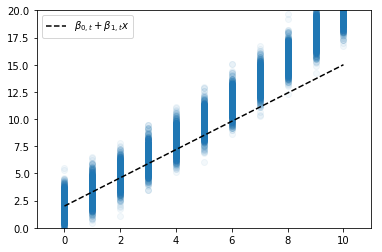

In [26]:
f,ax = plt.subplots()
x   = experiments[0][0]
y_t = experiments[0][1]
ax.plot(x,y_t, linestyle='--', c='k', label=r'$\beta_{0,t} + \beta_{1,t} x$')

for experiment in experiments:
    x = experiment[0]
    y = experiment[2]
    ax.scatter(x,y, alpha=0.05, c='C0', rasterized=True)
ax.set_xlim(-1.0, 11.0)
ax.set_ylim(0.0, 20)
ax.legend()

In [27]:
beta0hats = np.asarray(experiments[:,4], dtype=np.float32)
beta1hats = np.asarray(experiments[:,5], dtype=np.float32)

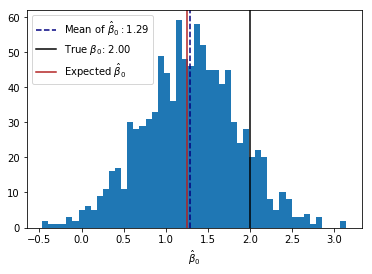

In [28]:
f,ax = plt.subplots()
beta0hat_mean = np.mean(beta0hats)
ax.hist(beta0hats,bins=50)
ax.set_xlabel(r"$\hat{\beta}_{0}$")
label_beta0hat_mean = r"Mean of $\hat{{\beta}}_{{0}}: {:.2f}$".format(beta0hat_mean)
label_beta0_t = r"True $\beta_{{0}}$: {:.2f}".format(beta0_t)
ax.axvline(beta0hat_mean, linestyle='--', c='navy', label=label_beta0hat_mean)
ax.axvline(beta0_t, linestyle='-', c='k', label=label_beta0_t)
ax.axvline(beta0_t+beta0hat_bias, c='firebrick', label=r'Expected $\hat{\beta}_{0}$')
ax.legend()

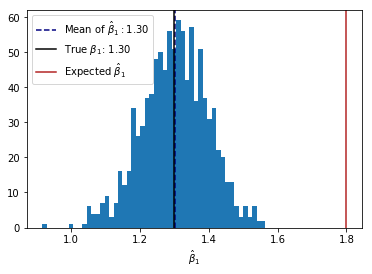

In [49]:
f,ax = plt.subplots()
beta1hat_mean = np.mean(beta1hats)
beta1hat_sample_variance = np.var(beta1hats, ddof=1)
ax.hist(beta1hats, bins=50)
ax.set_xlabel(r"$\hat{\beta}_{1}$")
label_beta1hat_mean = r"Mean of $\hat{{\beta}}_{{1}}: {:.2f}$".format(beta1hat_mean)
label_beta1_t = r"True $\beta_{{1}}$: {:.2f}".format(beta1_t)
ax.axvline(beta1hat_mean, linestyle='--', c='navy', label=label_beta1hat_mean)
ax.axvline(beta1_t, linestyle='-', c='k', label=label_beta1_t)
ax.axvline(beta1_t+beta1hat_bias, c='firebrick', label=r'Expected $\hat{\beta}_{1}$')
ax.legend()

In [50]:
beta1hat_sample_variance

0.0090776039


## Example for ideal case <br>$E[\epsilon_{i}] = 0 ~~~~ \forall i$

In [30]:
xrange = (0.0, 10.0)
npts = 11
x = np.linspace(xrange[0], xrange[1], npts)
a = 0.05
epsilon_means = np.zeros_like(x)
beta0_t = 2.0
beta1_t = 1.3

In [33]:
beta0hat_bias = calc_beta0hat_bias(x, epsilon_means)
beta1hat_bias = calc_beta1hat_bias(x, epsilon_means)
print("betahat0_bias: {}".format(beta0hat_bias))
print("betahat1_bias: {}".format(beta1hat_bias))

betahat0_bias: 0.0
betahat1_bias: 0.0


In [32]:
nensemble = 1000

In [34]:
experiments = np.array([generate_experiment(xrange, npts, epsilon_means, beta0_t, beta1_t) for i in range(nensemble)])

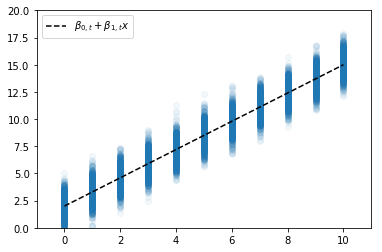

In [35]:
f,ax = plt.subplots()
x   = experiments[0][0]
y_t = experiments[0][1]
ax.plot(x,y_t, linestyle='--', c='k', label=r'$\beta_{0,t} + \beta_{1,t} x$')

for experiment in experiments:
    x = experiment[0]
    y = experiment[2]
    ax.scatter(x,y, alpha=0.05, c='C0', rasterized=True)
ax.set_xlim(-1.0, 11.0)
ax.set_ylim(0.0, 20)
ax.legend()

In [36]:
beta0hats = np.asarray(experiments[:,4], dtype=np.float32)
beta1hats = np.asarray(experiments[:,5], dtype=np.float32)

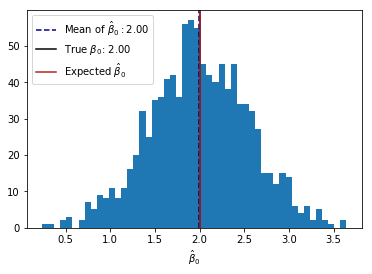

In [37]:
f,ax = plt.subplots()
beta0hat_mean = np.mean(beta0hats)
ax.hist(beta0hats,bins=50)
ax.set_xlabel(r"$\hat{\beta}_{0}$")
label_beta0hat_mean = r"Mean of $\hat{{\beta}}_{{0}}: {:.2f}$".format(beta0hat_mean)
label_beta0_t = r"True $\beta_{{0}}$: {:.2f}".format(beta0_t)
ax.axvline(beta0hat_mean, linestyle='--', c='navy', label=label_beta0hat_mean)
ax.axvline(beta0_t, linestyle='-', c='k', label=label_beta0_t)
ax.axvline(beta0_t+beta0hat_bias, c='firebrick', label=r'Expected $\hat{\beta}_{0}$')
ax.legend()

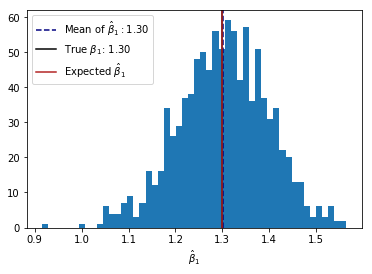

In [38]:
f,ax = plt.subplots()
beta1hat_mean = np.mean(beta1hats)
ax.hist(beta1hats, bins=50)
ax.set_xlabel(r"$\hat{\beta}_{1}$")
label_beta1hat_mean = r"Mean of $\hat{{\beta}}_{{1}}: {:.2f}$".format(beta1hat_mean)
label_beta1_t = r"True $\beta_{{1}}$: {:.2f}".format(beta1_t)
ax.axvline(beta1hat_mean, linestyle='--', c='navy', label=label_beta1hat_mean)
ax.axvline(beta1_t, linestyle='-', c='k', label=label_beta1_t)
ax.axvline(beta1_t+beta1hat_bias, c='firebrick', label=r'Expected $\hat{\beta}_{1}$')
ax.legend()